In [1]:
# Based on Fig 4.2 in the textboox 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=13, usetex=True)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

import os

In [2]:
X = np.concatenate([random_state.normal(15, 5, 350),
                    random_state.normal(20, 1, 600),
                    random_state.normal(30, 5, 2000)]).reshape(-1, 1)
if not os.path.isfile("formationchannels.npy"):
    np.save("formationchannels.npy",X)

X=np.load("formationchannels.npy")

As you see, the true number of modes is three. But you didn't know this because I just gave you the file.

[[14.50511868]
 [12.87667636]
 [14.28071691]
 ...
 [37.34714206]
 [28.62818454]
 [28.52640407]]


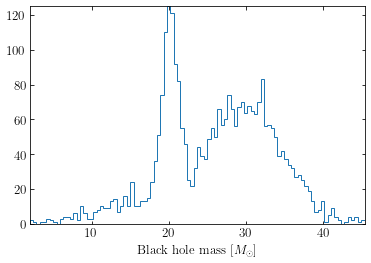

In [3]:
plt.hist(X,bins=100,histtype='step');
plt.xlabel("Black hole mass $[M_\odot]$")
print(X)

In [15]:
#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 10)
models = [None for i in range(len(N))]

for i in range(len(N)):
    #models[i] = GaussianMixture(N[i]).fit(X)
    models[i] = GaussianMixture(N[i],n_init=20).fit(X)




Text(0, 0.5, 'information criterion')

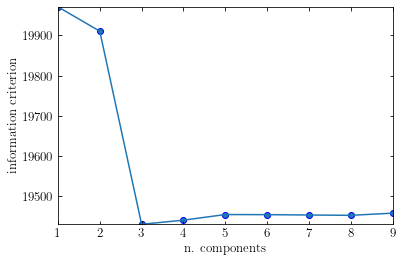

In [16]:
# compute the AIC. 
# It's built in into sklearn.mixture.GaussianMixture 
# but otherwise you can easily compute it from the maximum likelihood

AIC= [model.aic(X) for model in models]

plt.plot(N, AIC)
plt.scatter(N, AIC)

plt.xlabel('n. components')
plt.ylabel('information criterion')
#plt.legend(loc=2);


In [481]:
print('The AIC is minimized for N=', N[np.argmin(AIC)])

The AIC is minimized for N= 3


Let's try a different estimator, [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

$BIC = k \ln(n) - 2 ln(L_{\rm max})$

Text(0, 0.5, 'information criterion')

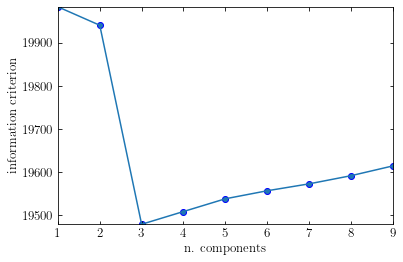

In [482]:
BIC= [model.bic(X) for model in models]

plt.plot(N, BIC,)
plt.scatter(N, BIC)

plt.xlabel('n. components')
plt.ylabel('information criterion')
#plt.legend(loc=2);

Let's plot this specific solution now:

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

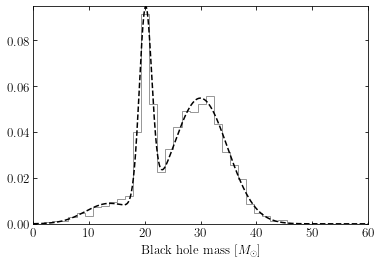

In [17]:
M_best = models[np.argmin(AIC)]

x = np.linspace(0, 60, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(X, 30, density=True, histtype='step', alpha=0.4,color='black')

plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

That's a nice fit after all. Let's add the individual modes now.

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

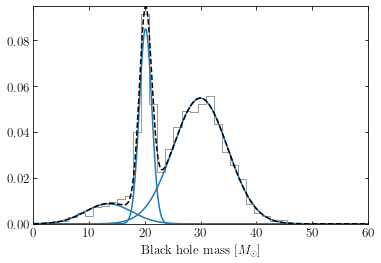

In [18]:
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(X, 30, density=True, histtype='step', alpha=0.4,color='black')

for i in range(N[np.argmin(AIC)]):
    plt.plot(x, pdf_individual[:,i], c='C0')

plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

In [488]:
### This takes a while...

N = np.arange(1, 10)

for it in range(100):

    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GaussianMixture(N[i],n_init=20).fit(X)
    AIC= [model.aic(X) for model in models]
    print("Iteration:", it, "best model N=", N[np.argmin(AIC)])

Iteration: 0 best model N= 3
Iteration: 1 best model N= 3
Iteration: 2 best model N= 3
Iteration: 3 best model N= 3
Iteration: 4 best model N= 3
Iteration: 5 best model N= 3
Iteration: 6 best model N= 3
Iteration: 7 best model N= 3
Iteration: 8 best model N= 3
Iteration: 9 best model N= 3
Iteration: 10 best model N= 3
Iteration: 11 best model N= 3
Iteration: 12 best model N= 3
Iteration: 13 best model N= 3
Iteration: 14 best model N= 3
Iteration: 15 best model N= 3
Iteration: 16 best model N= 3
Iteration: 17 best model N= 3
Iteration: 18 best model N= 3
Iteration: 19 best model N= 3
Iteration: 20 best model N= 3
Iteration: 21 best model N= 3
Iteration: 22 best model N= 3
Iteration: 23 best model N= 3
Iteration: 24 best model N= 3
Iteration: 25 best model N= 3
Iteration: 26 best model N= 3
Iteration: 27 best model N= 3
Iteration: 28 best model N= 3
Iteration: 29 best model N= 3
Iteration: 30 best model N= 3
Iteration: 31 best model N= 3
Iteration: 32 best model N= 3
Iteration: 33 best m